<a href="https://colab.research.google.com/github/Aleena24/Computer-Vision/blob/main/2348503_ESE_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [9]:
image = cv2.imread('/content/Set-2-q1.tif')

# 1.a) Mid-Point Filter

# Gaussian Noise

In [10]:
mean = 0
std_dev = 30
gaussian_noise = np.random.normal(mean, std_dev, image.shape).astype(np.uint8)
noisy_image = cv2.add(image, gaussian_noise)

(-0.5, 511.5, 511.5, -0.5)

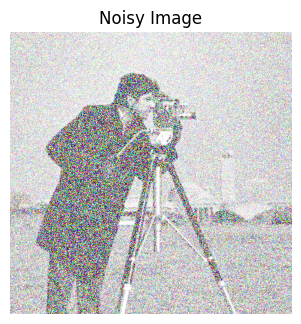

In [40]:
plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
plt.imshow(noisy_image)
plt.title('Noisy Image')
plt.axis('off')

# Mid-point Filter

In [18]:
filter_size = 3
padded_image = cv2.copyMakeBorder(noisy_image, filter_size // 2, filter_size // 2, filter_size // 2, filter_size // 2, cv2.BORDER_CONSTANT, value=0)
filtered_image = np.zeros_like(noisy_image)

for i in range(filter_size // 2, padded_image.shape[0] - filter_size // 2):
    for j in range(filter_size // 2, padded_image.shape[1] - filter_size // 2):
        window = padded_image[i - filter_size // 2:i + filter_size // 2 + 1, j - filter_size // 2:j + filter_size // 2 + 1]
        min_val = np.min(window)
        max_val = np.max(window)
        mid_point = (min_val + max_val) // 2
        filtered_image[i - filter_size // 2, j - filter_size // 2] = mid_point

<ipython-input-18-0459661a2f48>:10: RuntimeWarning: overflow encountered in scalar add
  mid_point = (min_val + max_val) // 2


# Image Display

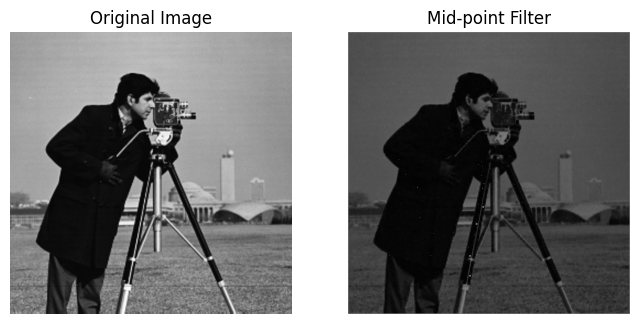

In [39]:
plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')


plt.subplot(1, 2, 2)
plt.imshow(filtered_image)
plt.title('Mid-point Filter')
plt.axis('off')
plt.show()

# 1.b) Alpha-Trimmed Filter

# salt and pepper

In [48]:
def add_salt_pepper_noise(image, salt_ratio=0.05, pepper_ratio=0.05):
    noisy_image = np.copy(image)
    if len(noisy_image.shape) == 2:
        height, width = noisy_image.shape
        salt_pixels = np.random.randint(0, height, int(height * width * salt_ratio))
        pepper_pixels = np.random.randint(0, height, int(height * width * pepper_ratio))
        noisy_image[salt_pixels, :] = 255
        noisy_image[pepper_pixels, :] = 0

    elif len(noisy_image.shape) == 3:
        height, width, channels = noisy_image.shape
        salt_pixels = np.random.randint(0, height, int(height * width * salt_ratio))
        pepper_pixels = np.random.randint(0, height, int(height * width * pepper_ratio))
        for channel in range(channels):
            noisy_image[salt_pixels, :, channel] = 255
            noisy_image[pepper_pixels, :, channel] = 0
    return noisy_image

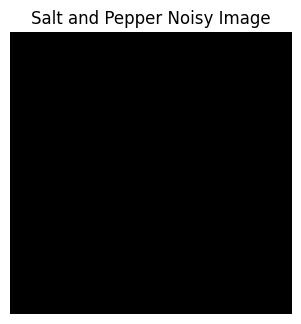

In [49]:
noisy_image = add_salt_pepper_noise(image)

plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.imshow(noisy_image)
plt.title('Salt and Pepper Noisy Image')
plt.axis('off')
plt.show()

# Alpha-Trimmed Filter

In [60]:
def alpha_trimmed_filter(image, filter_size, d_value):
    padded_image = cv2.copyMakeBorder(image, filter_size // 2, filter_size // 2, filter_size // 2, filter_size // 2, cv2.BORDER_CONSTANT, value=0)
    fil_image = np.zeros_like(image)
    m, n = filter_size, filter_size

    for i in range(filter_size // 2, padded_image.shape[0] - filter_size // 2):
        for j in range(filter_size // 2, padded_image.shape[1] - filter_size // 2):
            window = padded_image[i - filter_size // 2:i + filter_size // 2 + 1, j - filter_size // 2:j + filter_size // 2 + 1]
            sorted_window = np.sort(window.flatten())
            trimmed_window = sorted_window[d_value:m * n - 1 - d_value]
            fil_image[i - filter_size // 2, j - filter_size // 2] = np.mean(trimmed_window)

    return fil_image

In [61]:
filter_size = 3
d_value = 0

filtered_image = alpha_trimmed_filter(image, filter_size, d_value)

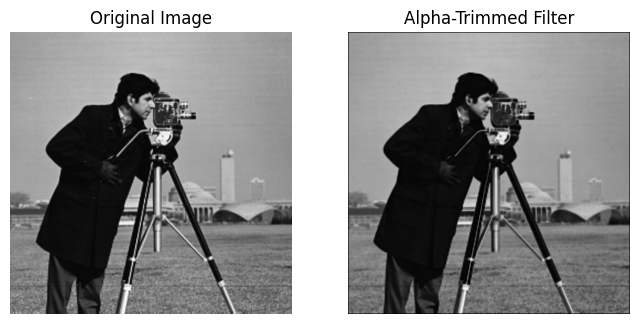

In [62]:
plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image)
plt.title('Alpha-Trimmed Filter')
plt.axis('off')

plt.show()

# 2.a) Gradient

In [64]:
image = cv2.imread('/content/set-2-q2.tif')

# Sobel gradient

In [65]:
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = np.sqrt(sobel_x**2 + sobel_y**2)

(<Axes: title={'center': 'Sobel Combined Edges'}>,
 Text(0.5, 1.0, 'Sobel Combined Edges'))

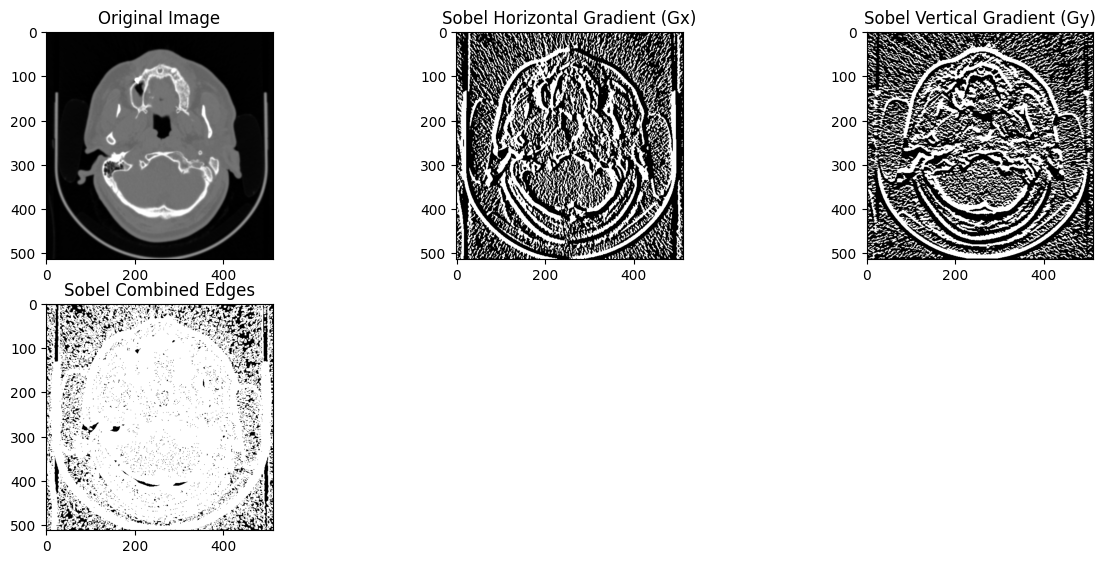

In [68]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(3, 3, 2), plt.imshow(sobel_x, cmap='gray'), plt.title('Sobel Horizontal Gradient (Gx)')
plt.subplot(3, 3, 3), plt.imshow(sobel_y, cmap='gray'), plt.title('Sobel Vertical Gradient (Gy)')
plt.subplot(3, 3, 4), plt.imshow(sobel_combined, cmap='gray'), plt.title('Sobel Combined Edges')


# Prewitt gradient calculation

In [66]:
prewitt_kernel_x = np.array([[1, 0, -1],
                              [1, 0, -1],
                              [1, 0, -1]])
prewitt_kernel_y = np.array([[1, 1, 1],
                              [0, 0, 0],
                              [-1, -1, -1]])
prewitt_x = cv2.filter2D(image, -1, prewitt_kernel_x)
prewitt_y = cv2.filter2D(image, -1, prewitt_kernel_y)
prewitt_combined = np.sqrt(prewitt_x**2 + prewitt_y**2)

# Robert gradient calculation

In [67]:
roberts_kernel_x = np.array([[1, 0],
                              [0, -1]])
roberts_kernel_y = np.array([[0, 1],
                              [-1, 0]])
roberts_x = cv2.filter2D(image, -1, roberts_kernel_x)
roberts_y = cv2.filter2D(image, -1, roberts_kernel_y)
roberts_combined = np.sqrt(roberts_x**2 + roberts_y**2)

In [ ]:


plt.subplot(3, 3, 5), plt.imshow(prewitt_x, cmap='gray'), plt.title('Prewitt Horizontal Gradient (Gx)')
plt.subplot(3, 3, 6), plt.imshow(prewitt_y, cmap='gray'), plt.title('Prewitt Vertical Gradient (Gy)')
plt.subplot(3, 3, 7), plt.imshow(prewitt_combined, cmap='gray'), plt.title('Prewitt Combined Edges')
plt.subplot(3, 3, 8), plt.imshow(roberts_x, cmap='gray'), plt.title('Robert Horizontal Gradient (Gx)')
plt.subplot(3, 3, 9), plt.imshow(roberts_y, cmap='gray'), plt.title('Robert Vertical Gradient (Gy)')
plt.subplot(3, 3, 9), plt.imshow(roberts_combined, cmap='gray'), plt.title('Robert Combined Edges')
plt.show()